<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Trabajando con opciones

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.

Principalmente, se puede resumir que las dos razones con más peso de importancia para utilizar opciones son el **aseguramiento** y la **especulación**.

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.


## 1. ¿Cómo descargar datos de opciones?

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 78)
# pd.set_option('precision', 3) 

In [2]:
import yfinance as yf

def get_options_data(ticker: "Ticker en formato string", download_data=False, fecha=None):
    """
    options_yf descarga información de opciones financieras con ayuda de yfinance

    *ticker : es el símbolo de cotización de la acción
    """
    stock = yf.Ticker(ticker)
    
    if fecha is None:
        fecha = stock.options[0]
        print(f'Fechas de cierre de contrato para las opciones: \n {stock.options}')
    
    if download_data:
        print(f'Se está descargando datos de call y put de la fecha {fecha}')
        calls, puts = stock.option_chain(fecha) 
        return (calls, puts)

ticker = 'AAPL'

get_options_data(ticker, download_data=False)

Fechas de cierre de contrato para las opciones: 
 ('2023-11-17', '2023-11-24', '2023-12-01', '2023-12-08', '2023-12-15', '2023-12-22', '2023-12-29', '2024-01-19', '2024-02-16', '2024-03-15', '2024-04-19', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-09-19', '2025-12-19', '2026-01-16')


In [3]:
expiry_date = '2024-03-15'
calls, puts = get_options_data(ticker, download_data=True, fecha=expiry_date)

Se está descargando datos de call y put de la fecha 2024-03-15


In [41]:
puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240315P00050000,2023-11-10 16:10:52+00:00,50.0,0.01,0.00,0.05,0.0,0.0,114.0,5744,0.792971,False,REGULAR,USD
1,AAPL240315P00055000,2023-11-07 15:28:48+00:00,55.0,0.01,0.01,0.10,0.0,0.0,12.0,692,0.796877,False,REGULAR,USD
2,AAPL240315P00060000,2023-11-13 17:25:02+00:00,60.0,0.02,0.01,0.10,0.0,0.0,1.0,701,0.742190,False,REGULAR,USD
3,AAPL240315P00065000,2023-11-10 18:07:54+00:00,65.0,0.02,0.01,0.10,0.0,0.0,131.0,470,0.691409,False,REGULAR,USD
4,AAPL240315P00070000,2023-11-09 14:30:08+00:00,70.0,0.02,0.01,0.11,0.0,0.0,10.0,1038,0.652347,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,AAPL240315P00250000,2023-09-28 14:16:45+00:00,250.0,80.60,81.30,82.20,0.0,0.0,1.0,0,0.877748,True,REGULAR,USD
41,AAPL240315P00270000,2022-12-30 17:02:25+00:00,270.0,141.05,122.45,125.65,0.0,0.0,2.0,0,1.496707,True,REGULAR,USD
42,AAPL240315P00275000,2022-12-21 17:27:28+00:00,275.0,139.65,137.80,140.10,0.0,0.0,NaN,0,1.748750,True,REGULAR,USD
43,AAPL240315P00280000,2023-05-04 19:09:28+00:00,280.0,114.02,97.05,100.65,0.0,0.0,NaN,0,0.652652,True,REGULAR,USD


In [5]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240315C00050000,2023-11-10 20:29:41+00:00,50.0,136.89,137.60,138.65,0.00,0.00000,6,777,1.195317,True,REGULAR,USD
1,AAPL240315C00055000,2023-11-03 13:50:19+00:00,55.0,121.00,132.70,133.75,0.00,0.00000,1,1028,1.139164,True,REGULAR,USD
2,AAPL240315C00060000,2023-11-08 17:35:44+00:00,60.0,122.65,127.80,128.85,0.00,0.00000,51,407,1.085942,True,REGULAR,USD
3,AAPL240315C00065000,2023-11-08 20:34:14+00:00,65.0,118.46,122.90,124.00,0.00,0.00000,1,110,1.040044,True,REGULAR,USD
4,AAPL240315C00070000,2023-11-09 18:42:43+00:00,70.0,114.10,118.00,119.05,0.00,0.00000,68,404,0.986328,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,AAPL240315C00280000,2023-11-08 18:02:03+00:00,280.0,0.02,0.01,0.03,0.00,0.00000,10,723,0.251961,False,REGULAR,USD
47,AAPL240315C00285000,2023-11-07 20:45:00+00:00,285.0,0.03,0.01,0.03,0.00,0.00000,5,1751,0.261726,False,REGULAR,USD
48,AAPL240315C00290000,2023-11-14 17:15:06+00:00,290.0,0.01,0.01,0.03,-0.02,-66.66667,5,554,0.271492,False,REGULAR,USD
49,AAPL240315C00300000,2023-11-14 18:29:01+00:00,300.0,0.01,0.00,0.02,-0.01,-50.00000,2,2949,0.279304,False,REGULAR,USD


Datos de la opción

In [42]:
calls.loc[0, :]

contractSymbol             AAPL240315C00050000
lastTradeDate        2023-11-10 20:29:41+00:00
strike                                    50.0
lastPrice                               136.89
bid                                      137.6
ask                                     138.65
change                                     0.0
percentChange                              0.0
volume                                       6
openInterest                               777
impliedVolatility                     1.195317
inTheMoney                                True
contractSize                           REGULAR
currency                                   USD
Name: 0, dtype: object

### Conceptos claves
- El precio de la oferta ('bid') se refiere al precio más alto que un comprador pagará por un activo.
- El precio de venta ('ask') se refiere al precio más bajo que un vendedor aceptará por un activo.
- La diferencia entre estos dos precios se conoce como 'spread'; cuanto menor es el spread, mayor es la liquidez de la garantía dada.
- Liquidez: facilidad de convertir cierta opción en efectivo.
- La volatilidad implícita es el pronóstico del mercado de un probable movimiento en el precio de un valor.
- La volatilidad implícita aumenta en los mercados bajistas y disminuye cuando el mercado es alcista.
- El último precio ('lastprice') representa el precio al que ocurrió la última operación, de una opción dada.

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha.

In [7]:
get_options_data('AAPL')

Fechas de cierre de contrato para las opciones: 
 ('2023-11-17', '2023-11-24', '2023-12-01', '2023-12-08', '2023-12-15', '2023-12-22', '2023-12-29', '2024-01-19', '2024-02-16', '2024-03-15', '2024-04-19', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-09-19', '2025-12-19', '2026-01-16')


In [8]:
fecha1 = '2024-09-20'
fecha2 = '2024-01-19'
ticker = 'AAPL'

calls_f1, puts_f1 = get_options_data(ticker, download_data=True, fecha=fecha1)

calls_f2, puts_f2 = get_options_data(ticker, download_data=True, fecha=fecha2)

calls_f1


Se está descargando datos de call y put de la fecha 2024-09-20
Se está descargando datos de call y put de la fecha 2024-01-19


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240920C00050000,2023-11-13 18:49:36+00:00,50.0,137.05,138.10,139.95,0.00,0.000000,5,2260,0.876222,True,REGULAR,USD
1,AAPL240920C00055000,2023-11-08 19:31:03+00:00,55.0,129.29,133.55,135.05,0.00,0.000000,136,669,0.844728,True,REGULAR,USD
2,AAPL240920C00060000,2023-11-08 20:07:54+00:00,60.0,124.40,128.90,130.60,0.00,0.000000,531,794,0.828127,True,REGULAR,USD
3,AAPL240920C00065000,2023-11-13 18:49:36+00:00,65.0,122.15,123.85,125.70,0.00,0.000000,5,243,0.776491,True,REGULAR,USD
4,AAPL240920C00070000,2023-11-09 18:36:21+00:00,70.0,116.04,119.15,121.10,0.00,0.000000,70,236,0.752078,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,AAPL240920C00270000,2023-11-10 17:40:11+00:00,270.0,0.49,0.44,0.47,0.00,0.000000,2,478,0.207650,False,REGULAR,USD
45,AAPL240920C00280000,2023-11-09 20:07:37+00:00,280.0,0.30,0.28,0.35,0.00,0.000000,35,903,0.213875,False,REGULAR,USD
46,AAPL240920C00290000,2023-11-08 17:23:05+00:00,290.0,0.23,0.21,0.26,0.00,0.000000,1,347,0.219246,False,REGULAR,USD
47,AAPL240920C00300000,2023-11-14 14:33:28+00:00,300.0,0.15,0.14,0.27,-0.02,-11.764703,5,1032,0.234627,False,REGULAR,USD


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde
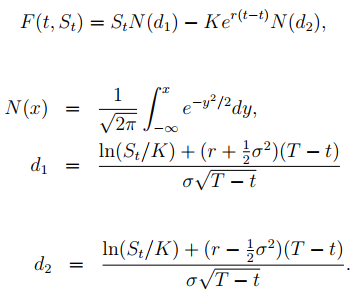

3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

Entonces, ¿qué es la **volatilidad implícita**?

La volatilidad es una medida de la incertidumbre sobre el comportamiento futuro de un activo, que se mide habitualmente como la desviación típica de la rentabilidad de dicho activo. 

## Volatility smile 
-  Cuando las opciones con la misma fecha de vencimiento y el mismo activo subyacente, pero diferentes precios de ejercicio, se grafican por la volatilidad implícita, la tendencia es que ese gráfico muestre una sonrisa.
-  La sonrisa muestra que las opciones más alejadas 'in- or out-of-the-money' tienen la mayor volatilidad implícita.
- No todas las opciones tendrán una sonrisa de volatilidad implícita. Las opciones de acciones a corto plazo y las opciones relacionadas con la moneda tienen más probabilidades de tener una sonrisa de volatilidad

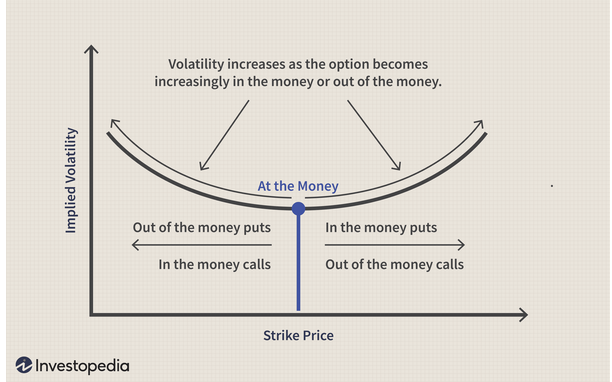

> Fuente: https://www.investopedia.com/terms/v/volatilitysmile.asp

> ### Validar para el call seleccionado. Encontrar el valor del activo subyacente [link](https://es.finance.yahoo.com/quote/AAPL/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABR84JCfGvfOqqwhhdyZDkm_jZhQyKTDrxwAfmp9jXl-VsvMSUbdIyj3UXrctm6rOvJ33GCHcZs3cYOkr60ISHUmiKBpNV3pffEWVAb1gyuQcT4U4LhhvaO3LASGq9oL1Bn9rCAODNzwokwbdHCvYx4WT4Au8QwCatcc3IbwU6yF)

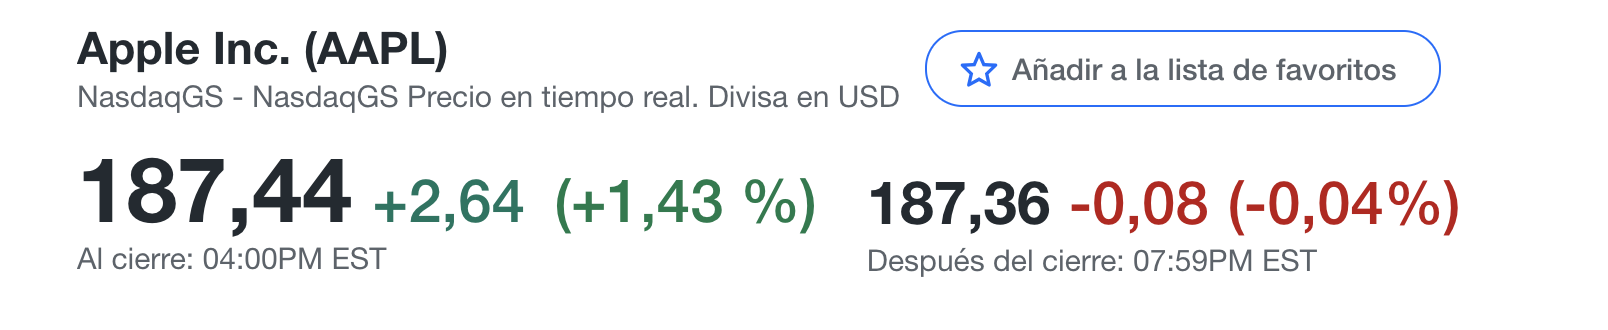

In [43]:
calls_f1.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240920C00050000,2023-11-13 18:49:36+00:00,50.0,137.05,138.10,139.95,0.0,0.0,5,2260,0.876222,True,REGULAR,USD
1,AAPL240920C00055000,2023-11-08 19:31:03+00:00,55.0,129.29,133.55,135.05,0.0,0.0,136,669,0.844728,True,REGULAR,USD
2,AAPL240920C00060000,2023-11-08 20:07:54+00:00,60.0,124.40,128.90,130.60,0.0,0.0,531,794,0.828127,True,REGULAR,USD
3,AAPL240920C00065000,2023-11-13 18:49:36+00:00,65.0,122.15,123.85,125.70,0.0,0.0,5,243,0.776491,True,REGULAR,USD
4,AAPL240920C00070000,2023-11-09 18:36:21+00:00,70.0,116.04,119.15,121.10,0.0,0.0,70,236,0.752078,True,REGULAR,USD


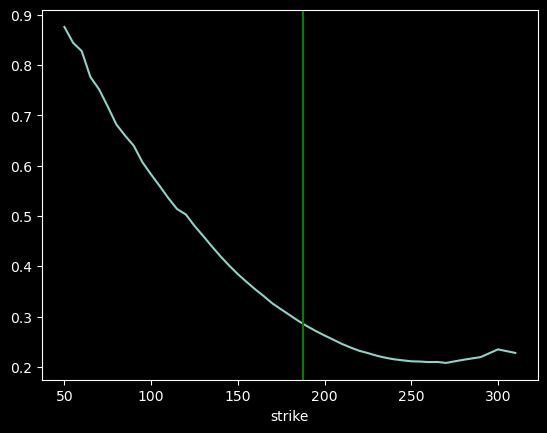

In [44]:
# para los call de la fecha 1
price_active = 187.44
ax = calls_f1.set_index('strike')['impliedVolatility'].plot()
ax.axvline(price_active, color='g');

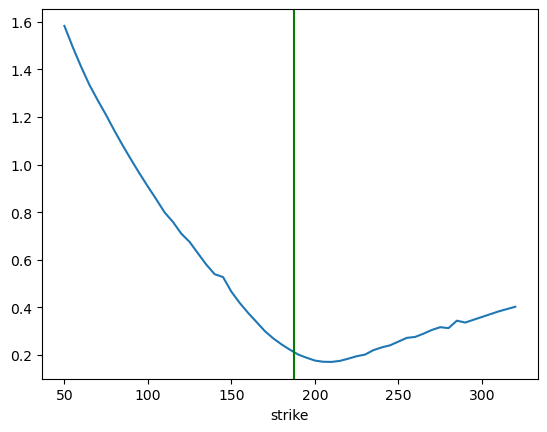

In [14]:
# para los call de la fecha 2
ax = calls_f2.set_index('strike')['impliedVolatility'].plot()
ax.axvline(price_active, color='g');

Analicemos ahora datos de los `put`

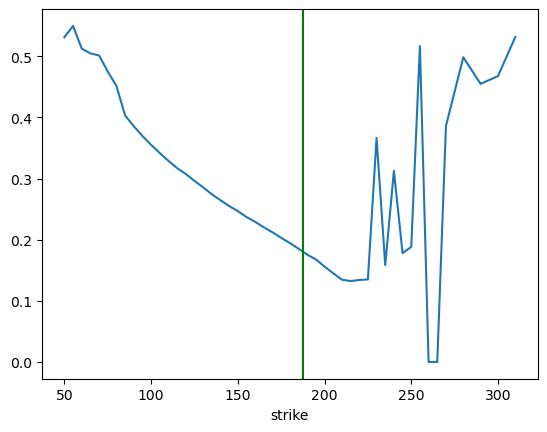

In [15]:
ax = puts_f1.set_index('strike')['impliedVolatility'].plot()
ax.axvline(price_active, color='g');

Para los `put` de la `fecha 1`

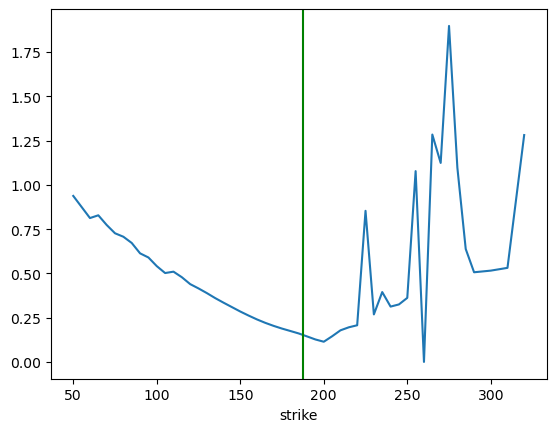

In [16]:
ax = puts_f2.set_index('strike')['impliedVolatility'].plot()
ax.axvline(price_active, color='g');

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [17]:
# Sobre escribir el paquete de yahoo finance a pandas datareader
import yfinance as yf
yf.pdr_override()

# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Si la cantidad de activos fue pasado cómo string entonces convertir el resultado a DataFrame
    if isinstance(tickers, str):
        closes = closes.to_frame(tickers)
    elif len(tickers) == 1:
        closes = closes.to_frame(tickers[0])
        
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

[*********************100%***********************]  1 of 1 completed


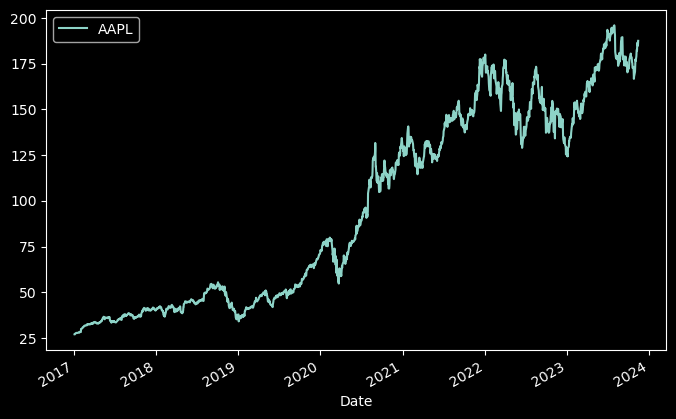

In [18]:
plt.style.use(['dark_background'])

ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [19]:
closes_aapl.iloc[-1]

AAPL    187.440002
Name: 2023-11-14 00:00:00, dtype: float64

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [20]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

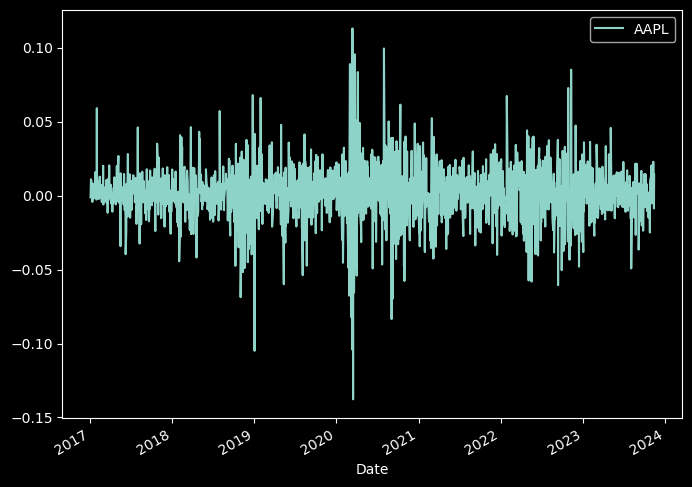

In [21]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

array([[<Axes: title={'center': 'AAPL'}>]], dtype=object)

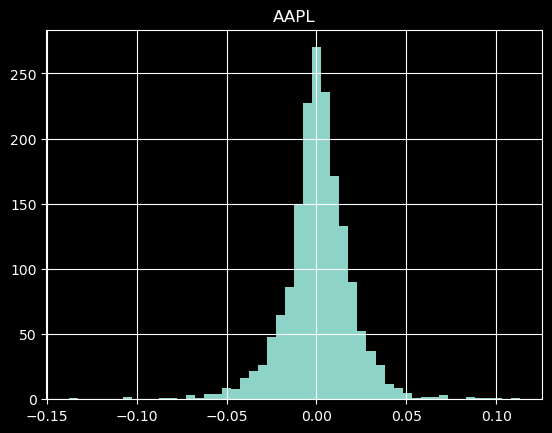

In [45]:
ret_aapl.hist(bins=50)

En base a la gráfica de volatilidad implícita podemos determinar el strike price de mi opción $K$.

In [28]:
calls_f2

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240119C00050000,2023-11-14 14:30:02+00:00,50.0,137.95,137.55,138.50,2.779999,2.056668,3,17090,1.583010,True,REGULAR,USD
1,AAPL240119C00055000,2023-11-09 20:07:36+00:00,55.0,127.54,132.60,133.55,0.000000,0.000000,6,3355,1.494143,True,REGULAR,USD
2,AAPL240119C00060000,2023-11-09 20:11:06+00:00,60.0,122.62,127.65,128.60,0.000000,0.000000,10,1817,1.411624,True,REGULAR,USD
3,AAPL240119C00065000,2023-11-09 20:03:13+00:00,65.0,117.59,122.70,123.65,0.000000,0.000000,37,1876,1.334964,True,REGULAR,USD
4,AAPL240119C00070000,2023-11-10 14:37:43+00:00,70.0,115.00,117.75,118.75,0.000000,0.000000,1,2035,1.270023,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,AAPL240119C00285000,2023-11-10 14:33:17+00:00,285.0,0.01,0.00,0.02,0.000000,0.000000,102,887,0.343757,False,REGULAR,USD
48,AAPL240119C00290000,2023-11-09 20:20:31+00:00,290.0,0.01,0.00,0.01,0.000000,0.000000,5,1552,0.335944,False,REGULAR,USD
49,AAPL240119C00300000,2023-11-14 19:30:18+00:00,300.0,0.02,0.00,0.01,0.010000,100.000000,10,28330,0.359381,False,REGULAR,USD
50,AAPL240119C00310000,2023-11-08 15:50:33+00:00,310.0,0.01,0.00,0.01,0.000000,0.000000,120,3299,0.382819,False,REGULAR,USD


In [29]:
K = 200 # strike price
indice_opt = calls_f2.loc[(calls_f2.strike==K)]
indice_opt

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
30,AAPL240119C00200000,2023-11-14 20:58:47+00:00,200.0,1.49,1.49,1.55,0.33,28.44828,7961,76187,0.176156,False,REGULAR,USD


In [31]:
indice_opt.T

,30
contractSymbol,AAPL240119C00200000
lastTradeDate,2023-11-14 20:58:47+00:00
strike,200.0
lastPrice,1.49
bid,1.49
ask,1.55
change,0.33
percentChange,28.44828
volume,7961
openInterest,76187


In [49]:
print('Precio del activo subyacente actual = ', closes_aapl.iloc[-1].values)

Precio del activo subyacente actual =  [187.44000244]


# Simulación de precios

### 1.1 Modelo normal de rendimientos

> https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

### ¿Qué sucede cuando el tiempo de cierre de mi contrato no es a un año?

En la fórmula de Black-Scholes, la tasa libre de riesgo utilizada se refiere a la tasa de interés libre de riesgo anualizada. Esto se debe a que el modelo supone que los precios del subyacente y la volatilidad del mismo son constantes durante el período de tiempo hasta la expiración de la opción, y utiliza la tasa de interés libre de riesgo para descontar el valor futuro de la opción al valor presente.

Sin embargo, si el parámetro `T` (fecha de cierre de mi contrato) representa un período de tiempo diferente a un año, entonces es necesario ajustar la tasa libre de riesgo para reflejar el período de tiempo en cuestión. Por ejemplo, si `T` representa 156 días, entonces la tasa libre de riesgo utilizada en la fórmula de Black-Scholes debe ser la tasa libre de riesgo anualizada equivalente para ese período de tiempo. Esto se puede calcular utilizando la siguiente fórmula:

$$
r_t = (1 + r_a)^{(t/365)} - 1
$$
Donde $r_t$ es la tasa libre de riesgo para el período de tiempo $t$ (expresado en días), $r_a$ es la tasa libre de riesgo anualizada y 365 es el número de días en un año.

Con esta información, vamos a calcular los datos en base a la fecha de cierre de mi contrato pactada.

In [52]:
# Desviación estándar de los rendimientos diaria
sigma_diaria = ret_aapl.std()

# Desviación estándar de los rendimientos diaria anualizada
sigma_a = sigma_diaria * np.sqrt(252)

# Tasa libre de riesgo anualizada
r_a = 0.0524

In [46]:
expiry_date = fecha2
expiry_date

'2024-01-19'

## Tasa de dividendos
**La tasa de dividendos es la cantidad de dinero que una empresa paga a sus accionistas en forma de dividendos**. Los dividendos son una forma de distribución de las ganancias de una empresa a sus accionistas y pueden ser pagados en efectivo, en acciones adicionales o en alguna otra forma de valor.

La tasa de dividendos se expresa como un porcentaje del precio de la acción y se calcula dividiendo el dividendo anual por la cotización actual de la acción. Por ejemplo, si una empresa paga un dividendo anual de $\$$2 por acción y la cotización actual de la acción es de $\$$100, la tasa de dividendos es del 2% $(\$2/\$100)$.

En la valoración de opciones sobre acciones, **la tasa de dividendos es importante porque afecta el valor de la opción**. Como mencioné anteriormente, el propietario de la opción tiene derecho a recibir cualquier dividendo que se pague durante el período hasta la expiración de la opción. Por lo tanto, si una empresa paga un dividendo, el valor de la opción se reduce debido a que se espera que el precio de la acción se reduzca después del pago del dividendo. En general, una tasa de dividendos más alta conduce a una reducción del valor de la opción.

## Donde se puede encontrar esta información
Pueden encontrar la tasa de dividendos de una empresa en Yahoo Finance de la siguiente manera:
1. Busca el ticker de la empresa que te interesa.
2. Haz clic en el ticker para acceder a la página de resumen de la empresa.
3. Haz clic en la pestaña "Estadísticas" en la parte superior de la página.
4. Desplázate hacia abajo hasta la sección "Rendimiento de dividendos" para ver la tasa de dividendos actual de la empresa. Si deseas ver el historial de dividendos de la empresa, puedes hacer clic en "Historial de dividendos" debajo de la sección "Rendimiento de dividendos".

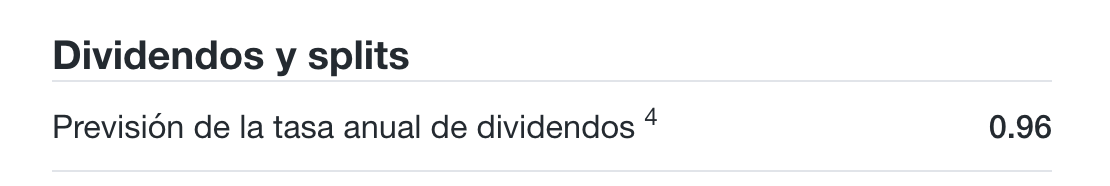

https://es.finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL

## Usar los datos de la opción a valuar

In [85]:
from datetime import date

# Datos de la opción y del día actual
today = pd.Timestamp(date.today())
expiry = expiry_date

dates = pd.date_range(start=today, end=expiry, freq='B')

NbTraj = 10000

# Tiempo de cierre de contrato en años
T = len(dates) / 365

# Pasos de tiempo
NbStep = 100

# Precio inicial del activo subyacente
S0 = closes_aapl.iloc[-1].values[0]

# Tasa libre de riesgo anualizada en función de la cantidad de días 
# de cierre del contrato
r = (1 + r_a)**(T) - 1

# Tasa anual de dividendos (yahoo finance)
q = 0.0096

# Volatilidad del activo subyacente anualizada
sigma = sigma_a.values[0]

# Strike price
K = K   

In [84]:
sigma_a.values[0]

0.3031187333248836

### Simulación de precios

In [86]:
def BSprices(mu, sigma, q, S0, NbTraj, NbStep, T):
    """
    Expresión de la solución de la ecuación de Black-Scholes
    St = S0*exp((r-sigma^2/2)*t+ sigma*DeltaW)
    
    Parámetros
    ---------
    mu    : Tasa libre de riesgo anualizada
    sigma : Desviación estándar de los rendimientos anualizada
    q     : tasa de dividendo anual
    S0    : Precio inicial del activo subyacente
    NbTraj: Cantidad de trayectorias a simular
    NbStep: Número de días a simular
    T     : Tiempo de cierre de la opción anualizada
    """
    # Datos para la fórmula de St
    nu = mu - q - (sigma**2)/2
    DeltaT = T/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    DeltaW = SqDeltaT*np.random.randn(NbTraj,NbStep-1)
    
    # Se obtiene --> Ln St = Ln S0+ nu*DeltaT + sigma*DeltaW
    increments = nu*DeltaT + sigma*DeltaW
    concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
    
    # Se utiliza cumsum por que se quiere simular los precios iniciando desde S0
    LogSt = np.cumsum(concat,axis=1)
    # Se obtienen los precios simulados para los NbStep fijados
    St = np.exp(LogSt)
    # Vector con la cantidad de días simulados
    t = np.arange(0,NbStep)
    
    prices = pd.DataFrame(St.T, index=t)

    return prices

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [87]:
# Resolvemos la ecuación de black scholes para obtener los precios
prices = BSprices(r, sigma, q, S0, NbTraj, NbStep, T)

prices

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
0,187.440002,187.440002,187.440002,187.440002,187.440002,187.440002,187.440002,...,187.440002,187.440002,187.440002,187.440002,187.440002,187.440002,187.440002
1,188.366389,183.227494,186.995682,189.031066,186.710377,186.500559,187.424540,...,187.694522,191.686066,188.052677,189.329427,185.433055,185.591513,188.901614
2,187.436439,185.182963,184.012594,190.942252,181.287848,183.088032,187.948555,...,186.681923,190.009455,189.448680,191.431602,185.524077,186.856386,186.662240
3,183.914801,182.142459,183.271376,189.606624,180.572495,182.148655,185.434221,...,190.269670,189.544095,187.663840,188.564311,184.803371,189.173984,187.673080
4,183.316371,179.508325,183.810478,189.105235,179.082699,183.874333,187.554808,...,191.004285,190.002464,184.463540,186.312228,185.290936,190.297419,186.466254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,218.839248,161.303352,182.564011,185.523443,208.693247,224.227653,211.526966,...,223.964037,186.062895,170.244864,209.306561,220.590007,170.543603,217.724871
96,218.937243,162.698736,181.833259,183.450187,207.509462,228.117714,214.551999,...,220.776274,182.806594,167.552993,209.231527,217.151617,169.892953,219.698187
97,215.679298,161.126312,187.155396,184.440281,204.996641,229.365060,216.818302,...,220.715981,178.985865,165.833636,208.336518,216.946444,167.291390,218.964067
98,220.525290,159.612787,189.100088,185.218012,207.556154,232.285870,215.612953,...,222.259339,181.642536,169.797259,204.587272,218.710845,165.238843,221.297141


<Axes: >

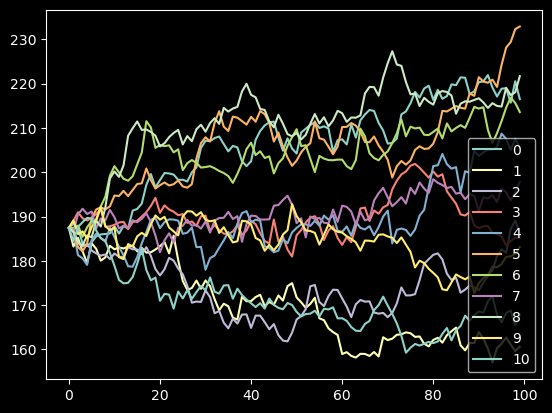

In [88]:
prices.loc[:, :10].plot()

## Valuar la opción Europea usando montecarlo

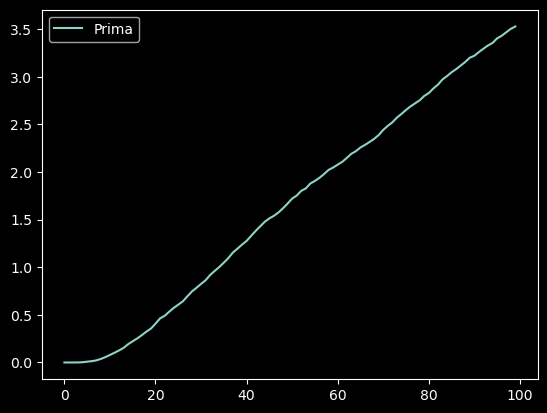

In [89]:
call_europea = pd.DataFrame({'Prima':np.exp(-r*T)*np.fmax(prices - K, 0).mean(axis=1)})
call_europea.plot();

In [90]:
call_europea.iloc[-1]

Prima    3.527129
Name: 99, dtype: float64

Intervalo de confianza del 95%

In [ ]:
confianza = 0.95
sigma_est = call_europea.sem().Prima
mean_est = call_europea.iloc[-1].Prima
i1 = st.t.interval(confianza, nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)


# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

$$C = S_0 \Phi(d_+) - e^{-rT}K\Phi(d_-)$$

where

$$d_{\pm} = \frac{1}{\sigma \sqrt{T}} \log\left(\frac{S_0}{e^{-rT}K}\right) \pm \frac{1}{2}\sigma \sqrt{T}$$
Aquí $\Phi$ es la CDF de la distribución normal.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Z.
</footer>